In [60]:
import pandas as pd
from vnstock import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from scipy import stats

In [106]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:,.2f}".format

**VnStock Data Basic Analysis**
In this module I am going to include:

- Reading a VnStock dataset into a Pandas data frame
- Analyzing and visualizing the number of tickers from all company types, top 6 sectors, and top 6 industries
- Visualizing stock values from the top 7 banks of Vietnam in 2023
- Extracting information and visualizing the correlation among all banks, excluding outliers
- Other basic information extraction methods

In [3]:
df_listcompany = listing_companies()
df_listcompany.head()

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,group,subgroup,icbCode,VN30,VNMID,VN100,VNSML,VNALL,HNX30,VNX50,VNXALL,VNDIAMOND,VNFINLEAD,VNFINSELECT,VNSI,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,True,False,True,False,True,False,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [4]:
top6_sector_df = df_listcompany.loc[df_listcompany['sector'].isin(['Công nghiệp', 'Hàng Tiêu dùng', 'Tài chính', 'Nguyên vật liệu',
                                                  'Tiện ích Cộng đồng', 'Dịch vụ Tiêu dùng'])]

In [5]:
top6_sector_df

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,group,subgroup,icbCode,VN30,VNMID,VN100,VNSML,VNALL,HNX30,VNX50,VNXALL,VNDIAMOND,VNFINLEAD,VNFINSELECT,VNSI,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,True,False,True,False,True,False,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,SDK,UPCOM,Công ty Cổ phần Cơ khí Luyện Kim,Cơ khí Luyện Kim,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Công nghiệp nặng,Máy công nghiệp,2757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1603,SRF,HOSE,Công ty Cổ phần Searefico,SEAREFICO,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Công nghiệp nặng,Máy công nghiệp,2757,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1604,UEM,UPCOM,Công ty Cổ phần Cơ điện Uông Bí - Vinacomin,Cơ điện Uông Bí - Vinacomin,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Công nghiệp nặng,Máy công nghiệp,2757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1605,VEA,UPCOM,Tổng Công ty Máy động lực và Máy nông nghiệp V...,Máy động lực và Máy NN,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Công nghiệp nặng,Máy công nghiệp,2757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df_listcompany['comTypeCode'].value_counts()

comTypeCode
CT    1512
CK      36
NH      29
QU      17
BH      13
Name: count, dtype: int64

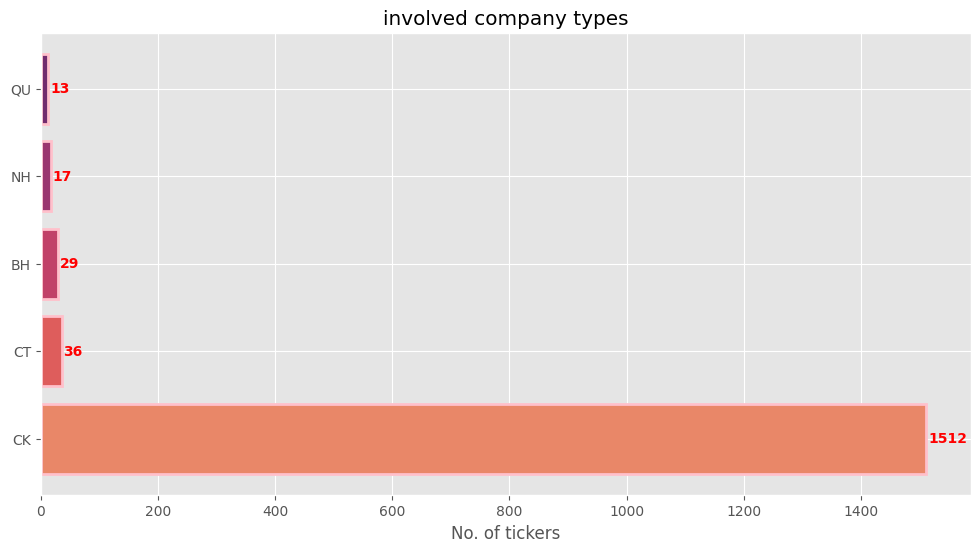

In [108]:
# find the most common company types
ComTypes = df_listcompany['comTypeCode'].unique()
values2 = df_listcompany['comTypeCode'].value_counts()

kwargs  =   {'edgecolor':"pink", # for edge color
             'linewidth':2, # line width of spot 
            }
             
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
yvals = range(len(ComTypes))
ax.barh(yvals, values2, align='center', alpha=1, color=sns.color_palette('flare',5),**kwargs)
for i, v in enumerate(values2):
    ax.text(v + 3, i, str(v), color='red', fontweight='bold', verticalalignment='center')
ax.set_yticks(np.arange(len(ComTypes)), labels=ComTypes)
ax.set_xlabel('No. of tickers')
# plt.tight_layout()
plt.title('involved company types')
plt.show()

In [8]:
df_listcompany['sector'].value_counts()

sector
Công nghiệp            586
Hàng Tiêu dùng         240
Tài chính              197
Nguyên vật liệu        182
Tiện ích Cộng đồng     145
Dịch vụ Tiêu dùng      122
Dược phẩm và Y tế       59
Công nghệ Thông tin     29
Ngân hàng               27
Dầu khí                 12
Viễn thông               8
Name: count, dtype: int64

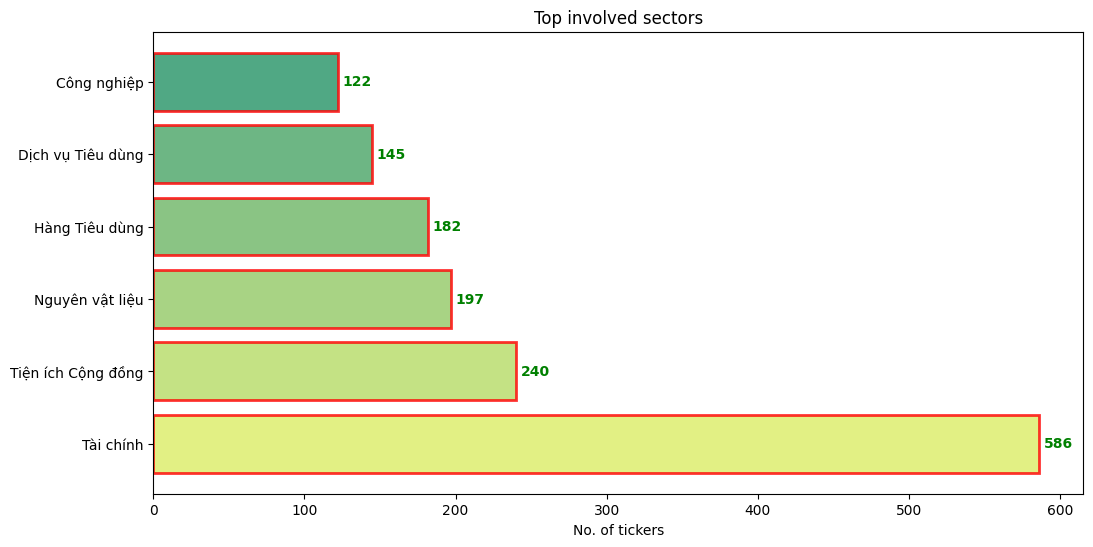

In [9]:
# find the 6 most involved sectors
names = top6_sector_df['sector'].unique()
values = top6_sector_df['sector'].value_counts()

kwargs  =   {'edgecolor':"red", # for edge color
             'linewidth':2, # line width of spot 
            }
             
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.8, color=sns.color_palette('summer_r',6),**kwargs)
for i, v in enumerate(values):
    ax.text(v + 3, i, str(v), color='green', fontweight='bold', verticalalignment='center')
ax.set_yticks(np.arange(len(names)), labels=names)
ax.set_xlabel('No. of tickers')
# plt.tight_layout()
plt.title('Top involved sectors')
plt.show()

In [10]:
df_listcompany['industry'].value_counts()

industry
Xây dựng và Vật liệu             326
Hàng & Dịch vụ Công nghiệp       260
Thực phẩm và đồ uống             149
Điện, nước & xăng dầu khí đốt    145
Bất động sản                     124
Tài nguyên Cơ bản                110
Hàng cá nhân & Gia dụng           76
Hóa chất                          72
Dịch vụ tài chính                 60
Y tế                              59
Du lịch và Giải trí               50
Truyền thông                      40
Bán lẻ                            32
Công nghệ Thông tin               29
Ngân hàng                         27
Ô tô và phụ tùng                  15
Bảo hiểm                          13
Dầu khí                           12
Viễn thông                         8
Name: count, dtype: int64

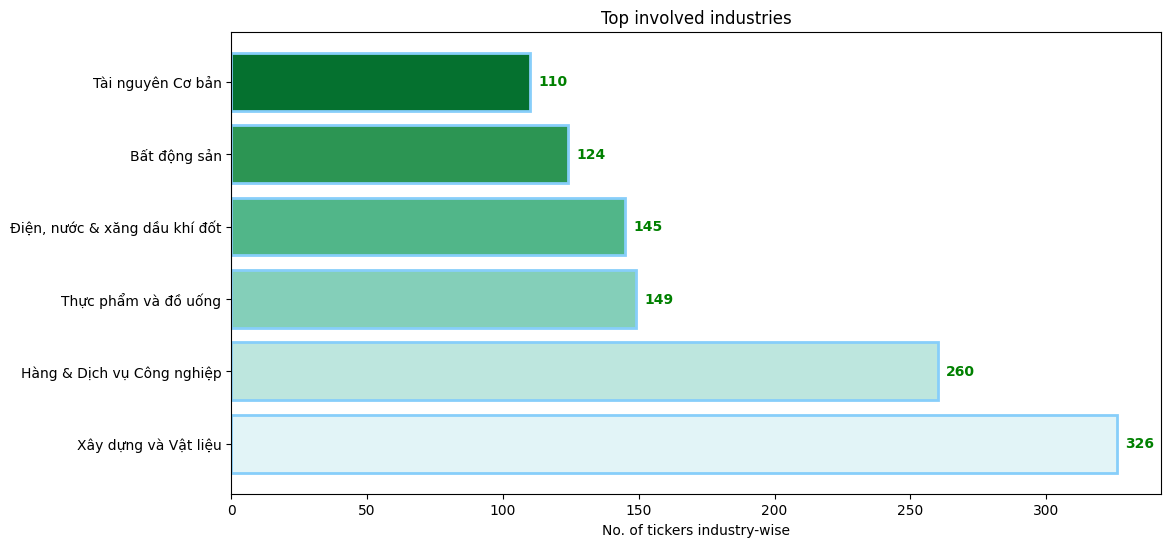

In [11]:
# find the 6 most involved industries
industry = ['Xây dựng và Vật liệu', 'Hàng & Dịch vụ Công nghiệp', 'Thực phẩm và đồ uống', 'Điện, nước & xăng dầu khí đốt',
            'Bất động sản', 'Tài nguyên Cơ bản']
ind_counts = [326, 260, 149, 145, 124, 110]

kwargs  =   {'edgecolor':"lightskyblue", # for edge color
             'linewidth':2, # line width of spot 
            }
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
yvals = range(len(industry))
ax.barh(yvals, ind_counts, align='center', alpha=1, color=sns.color_palette('BuGn',6),**kwargs)
for i, v in enumerate(ind_counts):
    ax.text(v + 3, i, str(v), color='green', fontweight='bold', verticalalignment='center')
ax.set_yticks(np.arange(len(industry)), labels=industry)
ax.set_xlabel('No. of tickers industry-wise')
# plt.tight_layout()
plt.title('Top involved industries')
plt.show()

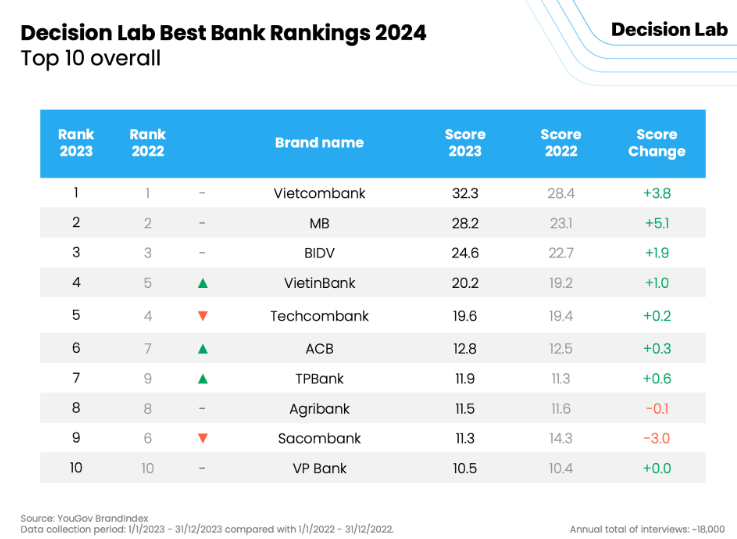

In [20]:
# Stock price data
df_VCB =  stock_historical_data(symbol='VCB', 
                            start_date="2021-01-01", 
                            end_date='2024-02-25')

In [13]:
df_MBB =  stock_historical_data(symbol='MBB', 
                            start_date="2021-01-01", 
                            end_date='2024-02-25')

In [14]:
df_BID =  stock_historical_data(symbol='BID', 
                            start_date="2021-01-01", 
                            end_date='2024-02-25')

In [15]:
df_CTG =  stock_historical_data(symbol='CTG', 
                            start_date="2021-01-01", 
                            end_date='2024-02-25')

In [16]:
df_ACB =  stock_historical_data(symbol='ACB', 
                            start_date="2021-01-01", 
                            end_date='2024-02-25')

In [17]:
df_TCB =  stock_historical_data(symbol='TCB', 
                            start_date="2021-01-01", 
                            end_date='2024-02-25')

In [18]:
df_TPB =  stock_historical_data(symbol='TPB', 
                            start_date="2021-01-01", 
                            end_date='2024-02-25')

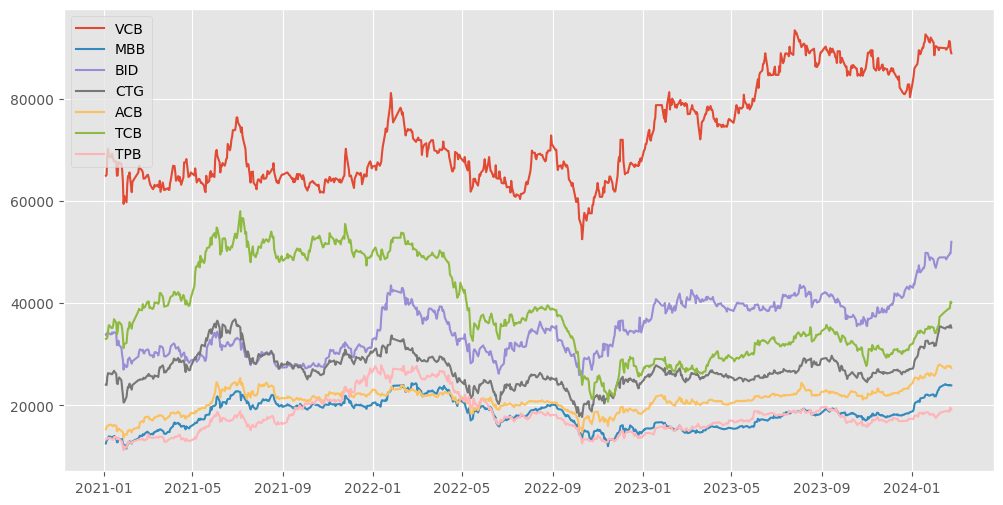

In [21]:
# Visualizing stock symbol
plt.style.use('ggplot' )
figure(figsize= (12,6)) # Adjust chart size
plt.plot(df_VCB['time'] ,df_VCB['close'] ,label='VCB')
plt.plot(df_MBB['time'] ,df_MBB['close'] ,label='MBB')
plt.plot(df_BID['time'] ,df_BID['close'] ,label='BID')
plt.plot(df_CTG['time'] ,df_CTG['close'] ,label='CTG')
plt.plot(df_ACB['time'] ,df_ACB['close'] ,label='ACB')
plt.plot(df_TCB['time'] ,df_TCB['close'] ,label='TCB')
plt.plot(df_TPB['time'] ,df_TPB['close'] ,label='TPB')
plt.legend()
plt.show()

In [22]:
# Calculate Average Debt Ratio of Banking sector
# Debt Ratio = Total Liabilities / Total Assets = 1 - Equity/Total Assets

In [23]:
# Filter companies belonging to Banking sector
list_bank = list(df_listcompany[df_listcompany['icbName'] == 'Ngân hàng']['ticker'].unique())

In [24]:
list_bank

['ACB',
 'BID',
 'CTG',
 'HDB',
 'MBB',
 'SSB',
 'SHB',
 'STB',
 'TCB',
 'TPB',
 'VCB',
 'VIB',
 'VPB',
 'ABB',
 'EIB',
 'BVB',
 'KLB',
 'LPB',
 'MSB',
 'NAB',
 'BAB',
 'NVB',
 'OCB',
 'PGB',
 'SGB',
 'VAB',
 'VBB']

In [ ]:
list_bank = list(df_listcompany[df_listcompany['icbName'] == 'Ngân hàng']['ticker'].unique())

In [25]:
financial_ratio(symbol= 'ACB' , report_range= 'yearly').index

Index(['ticker', 'priceToEarning', 'priceToBook', 'dividend', 'roe', 'roa',
       'earningPerShare', 'bookValuePerShare', 'interestMargin',
       'nonInterestOnToi', 'badDebtPercentage', 'provisionOnBadDebt',
       'costOfFinancing', 'equityOnTotalAsset', 'equityOnLoan', 'costToIncome',
       'equityOnLiability', 'epsChange', 'assetOnEquity', 'preProvisionOnToi',
       'postTaxOnToi', 'loanOnEarnAsset', 'loanOnAsset', 'loanOnDeposit',
       'depositOnEarnAsset', 'badDebtOnAsset', 'liquidityOnLiability',
       'payableOnEquity', 'cancelDebt', 'bookValuePerShareChange',
       'creditGrowth'],
      dtype='object')

In [42]:
financial_ratio(symbol= 'ACB' , report_range= 'yearly')[2022].loc['priceToEarning']

5.2

In [27]:
dict_ratio = {}
for ticker in list_bank:
    try: 
        equityOnTotalAsset = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['equityOnTotalAsset'])
        debt_ratio = 1 - equityOnTotalAsset 
        dict_ratio[ticker] = debt_ratio
    except:
        pass

In [28]:
dict_roe = {} 
for ticker in list_bank:
    try: 
        roe = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['roe'])
        dict_roe[ticker] = roe
    except:
        pass

In [29]:
dict_roa = {} 
for ticker in list_bank:
    try: 
        roa = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['roa'])
        dict_roa[ticker] = roa
    except:
        pass

In [35]:
dict_earningPerShare = {} 
for ticker in list_bank:
    try: 
        earningPerShare = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['earningPerShare'])
        dict_earningPerShare[ticker] = earningPerShare
    except:
        pass

In [36]:
dict_priceToEarning = {} 
for ticker in list_bank:
    try: 
        priceToEarning = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['priceToEarning'])
        dict_priceToEarning[ticker] = priceToEarning
    except:
        pass

In [37]:
dict_priceToBook = {} 
for ticker in list_bank:
    try: 
        priceToBook = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['priceToBook'])
        dict_priceToBook[ticker] = priceToBook
    except:
        pass

In [45]:
dict_equityOnTotalAsset = {} 
for ticker in list_bank:
    try: 
        equityOnTotalAsset = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['equityOnTotalAsset'])
        dict_equityOnTotalAsset[ticker] = equityOnTotalAsset
    except:
        pass

In [38]:
dict_creditGrowth = {} 
for ticker in list_bank:
    try: 
        creditGrowth = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['creditGrowth'])
        dict_creditGrowth[ticker] = creditGrowth
    except:
        pass

In [48]:
roelist = list(dict_roe.values())
roalist = list(dict_roa.values())
indexlist = list(dict_roa.keys())
earningPerSharelist = list(dict_earningPerShare.values())
priceToEarninglist = list(dict_priceToEarning.values())
priceToBooklist = list(dict_priceToBook.values())
equityOnTotalAssetlist = list(dict_equityOnTotalAsset.values())
debtlist = list(dict_ratio.values())
creditGrowthlist = list(dict_creditGrowth.values())
dictionary = {'bank': indexlist, 'roe': roelist, 'roa': roalist, 'debt_ratio': debtlist, 'earningPerShare':earningPerSharelist,
             'priceToEarning':priceToEarninglist, 'priceToBook':priceToBooklist, 'equityOnTotalAsset': equityOnTotalAssetlist,  
              'creditGrowth':creditGrowthlist}
 
data = pd.DataFrame(dictionary)

In [52]:
data

,bank,roe,roa,debt_ratio,earningPerShare,priceToEarning,priceToBook,equityOnTotalAsset,creditGrowth
0,ACB,0.27,0.02,0.90,"3,524.00",5.20,1.20,0.10,0.14
1,BID,0.20,0.01,0.95,"3,185.00",10.80,1.90,0.05,0.12
2,CTG,0.17,0.01,0.94,"3,123.00",7.80,1.20,0.06,0.13
3,HDB,0.23,0.02,0.91,"2,679.00",4.90,1.00,0.09,0.30
4,MBB,0.26,0.03,0.89,"3,352.00",4.30,0.90,0.11,0.27
5,SSB,0.18,0.02,0.89,"1,623.00",16.80,2.60,0.11,0.21
6,SHB,0.20,0.01,0.92,"2,110.00",4.00,0.70,0.08,0.06
7,STB,0.14,0.01,0.94,"2,673.00",8.40,1.10,0.07,0.13
8,TCB,0.20,0.03,0.84,"5,720.00",4.50,0.80,0.16,0.21
9,TPB,0.21,0.02,0.90,"2,843.00",4.80,0.90,0.10,0.14


In [53]:
dataupdate_df = data.drop(21)

In [63]:
dataupdate_df = dataupdate_df.drop('bank', axis=1)

In [65]:
corr_mat = dataupdate_df.corr()
corr_mat

,roe,roa,debt_ratio,earningPerShare,priceToEarning,priceToBook,equityOnTotalAsset,creditGrowth
roe,1.00,0.77,-0.14,0.73,-0.53,0.28,0.14,0.31
roa,0.77,1.00,-0.70,0.66,-0.41,0.15,0.70,0.45
debt_ratio,-0.14,-0.70,1.00,-0.18,-0.06,-0.00,-1.00,-0.33
earningPerShare,0.73,0.66,-0.18,1.00,-0.35,0.33,0.18,0.27
priceToEarning,-0.53,-0.41,-0.06,-0.35,1.00,0.53,0.06,-0.22
priceToBook,0.28,0.15,-0.00,0.33,0.53,1.00,0.00,0.05
equityOnTotalAsset,0.14,0.70,-1.00,0.18,0.06,0.00,1.00,0.33
creditGrowth,0.31,0.45,-0.33,0.27,-0.22,0.05,0.33,1.00


<Axes: >

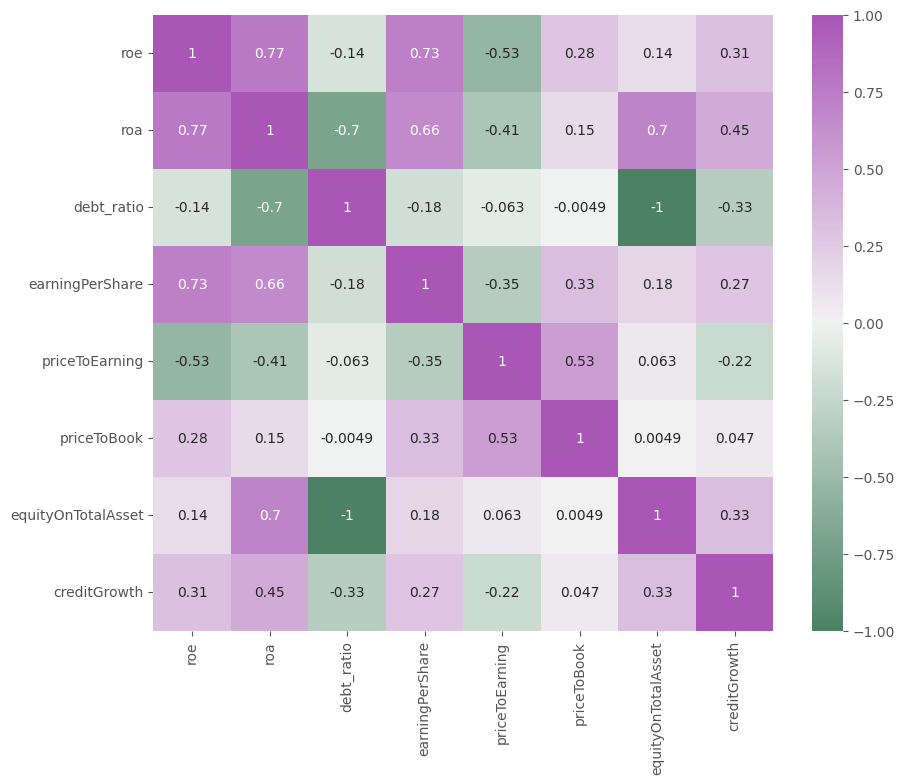

In [83]:
plt.figure(figsize =(10,8))
colormap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.heatmap(data=corr_mat, annot=True, cmap=colormap)

In [98]:
list_bđs = list(df_listcompany[df_listcompany['icbName'] == 'Hàng cá nhân & Gia dụng']['ticker'].unique())

In [99]:
list_bđs

[]

In [75]:
sum(dict_ratio.values())/len(dict_ratio.values())

0.9077407407407407

In [76]:
list_bank = list(df_listcompany[df_listcompany['icbName'] == 'Bất động sản']['ticker'].unique())
dict_ratio = {}
for ticker in list_bank:
    try: 
        equityOnTotalAsset = float(financial_ratio(symbol= ticker , report_range= 'yearly')[2022].loc['equityOnTotalAsset'])
        debt_ratio = 1 - equityOnTotalAsset 
        dict_ratio[ticker] = debt_ratio
    except:
        pass

In [85]:
company_fundamental_ratio (symbol='PAN', mode='simplify', missing_pct=0.8).columns

Index(['ticker', 'priceToEarning.top200AvgValue',
       'priceToEarning.industryAvgValue', 'valueBeforeEbitda.top200AvgValue',
       'valueBeforeEbitda.industryAvgValue', 'priceToBook.top200AvgValue',
       'priceToBook.industryAvgValue', 'dividend.top200AvgValue',
       'dividend.industryAvgValue', 'roe.top200AvgValue',
       'roe.industryAvgValue', 'roa.top200AvgValue', 'roa.industryAvgValue',
       'grossProfitMargin.top200AvgValue',
       'grossProfitMargin.industryAvgValue',
       'operatingProfitMargin.top200AvgValue',
       'operatingProfitMargin.industryAvgValue',
       'postTaxMargin.top200AvgValue', 'postTaxMargin.industryAvgValue',
       'debtOnEquity.top200AvgValue', 'debtOnEquity.industryAvgValue',
       'debtOnAsset.top200AvgValue', 'debtOnAsset.industryAvgValue',
       'debtOnEbitda.top200AvgValue', 'debtOnEbitda.industryAvgValue',
       'shortOnLongDebt.top200AvgValue', 'shortOnLongDebt.industryAvgValue',
       'ebitOnInterest.top200AvgValue', 'ebitOnInte

In [86]:
df1 = company_subsidiaries_listing (symbol='PAN', page_size=100, page=0)

In [87]:
df1[df1['subCompanyName'].str.contains("SSI")]

,ticker,subCompanyName,subOwnPercent
14,PAN,Công ty Cổ phần Chứng khoán SSI,0.00


In [88]:
company_officers (symbol='PAN', page_size=20, page=0)

,ticker,officerName,officerPosition,officerOwnPercent
3,PAN,Bùi Thanh Vân,Thành viên Ban kiểm soát,0.01
0,PAN,Nguyễn Duy Hưng,Chủ tịch Hội đồng Quản trị,0.01
2,PAN,Nguyễn Văn Khải,None,0.01
1,PAN,Nguyễn Thị Trà My,None,0.00
4,PAN,Hà Thị Thanh Vân,Thành viên Hội đồng Quản trị,0.00
5,PAN,Hà Thị Thanh Vân,Thành viên Ban Kiểm toán nội bộ,0.00
6,PAN,Nguyễn Khắc Hải,None,0.00
12,PAN,Michael Louis Rosen,None,0.00
7,PAN,Đoàn Thị Hồng Thúy,None,0.00
8,PAN,Nguyễn Duy Khánh,None,0.00


In [89]:
dividend_history("HPG")

,exerciseDate,cashYear,cashDividendPercentage,issueMethod
0,17/06/22,2021,0.05,cash
1,17/06/22,2022,0.30,share
2,31/05/21,2021,0.35,share
3,31/05/21,2020,0.05,cash
4,29/07/20,2019,0.05,cash
5,29/07/20,2020,0.20,share
6,04/06/19,2019,0.30,share
7,12/06/18,2018,0.40,share
8,30/03/17,2017,0.50,share
9,25/08/16,2016,0.15,share


In [90]:
financial_ratio("HPG", 'quarterly', True)

range,Q4-2023,Q3-2023,Q2-2023,Q1-2023,Q4-2022,Q3-2022,Q2-2022,Q1-2022,Q4-2021,Q3-2021,Q2-2021,Q1-2021,Q4-2020,Q3-2020,Q2-2020,Q1-2020,Q4-2019,Q3-2019,Q2-2019,Q1-2019,Q4-2018,Q3-2018,Q2-2018,Q1-2018,Q4-2017,Q3-2017,Q2-2017,Q1-2017,Q4-2016,Q3-2016,Q2-2016,Q1-2016,Q4-2015,Q3-2015,Q2-2015,Q1-2015,Q4-2014,Q3-2014,Q2-2014,Q1-2014,Q4-2013,Q3-2013,Q2-2013,Q1-2013,Q4-2012,Q3-2012,Q2-2012,Q1-2012,Q4-2011,Q3-2011,Q2-2011,Q1-2011,Q4-2010,Q3-2010,Q2-2010,Q1-2010,Q4-2009,Q3-2009,Q2-2009,Q1-2009,Q4-2008,Q3-2008,Q2-2008
ticker,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG,HPG
quarter,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2
year,2023,2023,2023,2023,2022,2022,2022,2022,2021,2021,2021,2021,2020,2020,2020,2020,2019,2019,2019,2019,2018,2018,2018,2018,2017,2017,2017,2017,2016,2016,2016,2016,2015,2015,2015,2015,2014,2014,2014,2014,2013,2013,2013,2013,2012,2012,2012,2012,2011,2011,2011,2011,2010,2010,2010,2010,2009,2009,2009,2009,2008,2008,2008
priceToEarning,25.40,81.70,-79.70,182.10,12.30,6.90,4.30,5.60,5.90,7.30,9.00,8.40,10.00,8.00,8.20,5.60,8.40,8.00,7.90,8.20,7.50,9.50,8.90,10.80,8.60,7.60,6.70,5.60,6.00,8.10,6.60,5.90,6.50,7.00,7.00,7.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
priceToBook,1.70,1.50,1.60,1.30,1.10,1.30,1.30,2.00,2.30,2.80,3.10,2.30,2.30,1.60,1.40,0.90,1.30,1.30,1.40,1.60,1.60,2.30,2.20,2.60,2.10,1.90,2.10,2.00,2.00,2.30,1.80,1.50,1.60,1.70,1.70,1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valueBeforeEbitda,13.70,19.60,22.50,18.90,9.00,6.00,3.60,3.60,5.50,5.80,8.70,9.50,10.10,9.40,9.10,8.10,7.70,8.80,7.10,6.90,6.90,5.90,8.90,6.90,7.80,9.30,6.30,5.30,4.20,4.90,5.20,4.40,5.30,4.40,5.20,6.10,5.70,6.00,7.00,6.90,7.50,7.20,7.00,6.80,6.60,5.30,5.30,5.50,3.80,4.60,4.60,5.00,6.60,7.60,8.20,9.50,8.30,15.80,13.40,9.70,NaN,NaN,NaN
roe,0.07,0.02,-0.02,0.01,0.09,0.20,0.35,0.43,0.46,0.46,0.40,0.31,0.25,0.21,0.18,0.17,0.17,0.17,0.20,0.21,0.24,0.27,0.30,0.30,0.31,0.32,0.35,0.41,0.39,0.33,0.30,0.28,0.27,0.27,0.27,0.26,0.29,0.31,0.28,0.24,0.22,0.19,0.17,0.15,0.12,0.12,0.10,0.12,0.17,0.23,0.27,0.27,0.24,0.22,0.24,0.27,0.28,0.18,0.15,0.17,0.23,0.37,0.35
roa,0.04,0.01,-0.01,0.00,0.05,0.10,0.16,0.22,0.22,0.22,0.18,0.15,0.12,0.10,0.09,0.08,0.08,0.09,0.10,0.12,0.13,0.15,0.18,0.18,0.19,0.20,0.21,0.24,0.23,0.20,0.18,0.16,0.15,0.15,0.15,0.13,0.14,0.14,0.14,0.12,0.09,0.08,0.07,0.07,0.06,0.06,0.04,0.05,0.08,0.09,0.11,0.12,0.11,0.10,0.12,0.15,0.16,0.13,0.10,0.12,0.17,0.32,0.25
daysReceivable,45,64,67,67,50,55,44,45,31,44,29,30,17,30,31,29,14,16,14,14,14,15,13,13,14,12,12,13,15,15,13,15,16,11,14,18,18,11,14,19,23,24,24,27,29,27,25,29,31,23,21,21,29,22,25,20,34,16,36,27,37,16,32
daysInventory,119,137,147,117,112,123,140,104,115,132,129,110,117,109,111,106,117,125,108,94,107,113,108,106,113,105,120,113,128,117,118,105,120,118,116,126,137,137,138,140,171,189,191,161,165,157,166,137,133,138,144,107,110,117,137,118,128,73,116,103,81,58,103


In [101]:
BS_HPG = financial_report (symbol='HPG', report_type='BalanceSheet', frequency='yearly', periods=15, latest_year=None)

In [102]:
BS_HPG['2023']

0     187,782,586,563,801.00
1      82,716,439,173,043.00
2      12,267,401,160,884.00
3       3,771,595,160,884.00
4       8,495,806,000,000.00
               ...          
113        65,769,846,489.00
114                     0.00
116                     0.00
117                     0.00
119   187,782,586,563,801.00
Name: 2023, Length: 113, dtype: float64

In [103]:
list_bank = list(df_listcompany[df_listcompany['icbName'] == 'Ngân hàng']['ticker'].unique())
for bank in list_bank[:5]:
    BS = financial_report (symbol=bank, report_type='BalanceSheet', frequency='yearly', periods=5, latest_year=None)[['CHỈ TIÊU','2023']]
    BS.to_excel(bank+'.xlsx', index= False)

In [104]:
financial_report (symbol='ACB', report_type='BalanceSheet', frequency='yearly', periods=5, latest_year=None)[['CHỈ TIÊU','2023']]

,CHỈ TIÊU,2023
0,TỔNG TÀI SẢN,"718,794,589,000,000.00"
1,"Tiền mặt, vàng bạc, đá quý","6,909,300,000,000.00"
2,Tiền gửi tại Ngân hàng nhà nước Việt Nam,"18,504,814,000,000.00"
3,Tiền gửi tại các TCTD khác và cho vay các TCTD...,"114,873,931,000,000.00"
4,Chứng khoán kinh doanh,"7,177,069,000,000.00"
5,Chứng khoán kinh doanh,"7,323,489,000,000.00"
6,Dự phòng giảm giá chứng khoán kinh doanh,"-146,420,000,000.00"
7,Các công cụ tài chính phái sinh và các tài sản...,0.00
8,Cho vay khách hàng,"482,234,900,000,000.00"
9,Cho vay khách hàng,"487,601,852,000,000.00"
